In [127]:
import matplotlib.pyplot as plt
import numpy as np
import torch

#### Plotting methods

In [128]:
def plot_results(results_matrix, list_gammas, baseline_accs, subtitle=''):
    """
    Plots a 3×2 grid of encoder results.
    Adds:
    - red vertical line at best gamma
    - red gamma value below x-axis
    - red accuracy value next to curve peak
    - baseline line and annotation
    """
    gammas = np.array(list_gammas)
    mask = gammas > 0
    gammas = gammas[mask]
    data = results_matrix[:, :, mask, :]  # shape (2, 3, len(gammas), 2)

    fairness = ["DP", "EO"]
    tests = ["Bias", "No Bias", "Inversed Bias"]
    colors = ['blue', 'darkorange', 'green']

    fig, axes = plt.subplots(3, 2, figsize=(12, 10))

    for col in range(2):  # DP, EO
        for row in range(3):  # Bias, No Bias, Inversed Bias
            ax = axes[row, col]
            y = data[col, row, :, 0]
            ax.plot(gammas, y, color=colors[row])

            # Max accuracy and gamma
            max_idx = np.argmax(y)
            gamma_max = gammas[max_idx]
            acc_max = y[max_idx]

            # Red vertical line
            ax.axvline(x=gamma_max, color='red', linestyle='-', linewidth=1.5)

            # Gamma annotation below x-axis
            ax.text(gamma_max, 0.02, f"{gamma_max:.1e}",
                    ha='left', va='bottom', color='red', fontsize=8)

            # Accuracy annotation near the peak
            ax.annotate(f"{100*acc_max:.1f}%",
                        xy=(gamma_max, acc_max),
                        xytext=(5, 5),
                        textcoords='offset points',
                        color=colors[row], fontsize=8,
                        ha='left', va='bottom',
                        arrowprops=dict(arrowstyle='->', color=colors[row], lw=0.8))

            # Baseline line
            baseline = baseline_accs[row]
            ax.axhline(baseline, ls='--', color='dimgray', label="Baseline")

            # Robust baseline annotation using axis transform
            ax.annotate(f"{100*baseline:.1f}%",
                        xy=(0.01, baseline),
                        xycoords=('axes fraction', 'data'),
                        xytext=(0, -4), textcoords='offset points',
                        ha='left', va='top', fontsize=8, color='dimgray')

            ax.set_xscale("log")
            ax.set_ylim([-0.1, 1.1])
            ax.set_ylabel("Accuracy")
            if row == 2:
                ax.set_xlabel("Gamma")
            ax.set_title(f"{tests[row]} – {fairness[col]}")
            ax.legend()
            ax.grid(True)

    plt.suptitle("Classifier performance on test sets with different biases", fontsize=16)
    if subtitle:
        plt.figtext(0.5, 0.92, subtitle, ha='center', fontsize=14, style='italic')
    plt.tight_layout(rect=[0.05, 0, 0.95, 0.9]) 
    plt.show()

In [129]:
def plot_results_adv(results_matrix, list_gammas, K):
    """
    Plots a 1×2 grid of adversary results:
    Columns: DP and EO
    All three test conditions plotted per subplot.
    """
    gammas = np.array(list_gammas)
    mask = gammas > 0
    gammas = gammas[mask]
    data = results_matrix[:, :, mask, :]  # shape (2, 3, len(gammas), 2)

    fairness = ["DP", "EO"]
    tests = ["Bias", "Bias = 0", "Inversed Bias"]

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    for col in range(2):  # DP, EO
        ax = axes[col]
        for t_idx, label in enumerate(tests):
            y = data[col, t_idx, :, 1]  # Adversary results
            ax.plot(gammas, y, label=label)
        ax.axhline(1 / K, ls='--', color='gray', label="Baseline")
        ax.set_xscale("log")
        ax.set_ylim([-0.1, 1.1])
        ax.set_xlabel("Gamma")
        ax.set_ylabel("Accuracy")
        ax.set_title(f"Adversaries – {fairness[col]}")
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

#### The following tests were run for 15 epochs, and 20 values of $\gamma$ (specified below)

In [130]:
list_gammas =  [0] + torch.logspace(-5, 1, steps=19).tolist()

## BIAS $\beta=0.8$

### MNIST dataset, MLP encoder

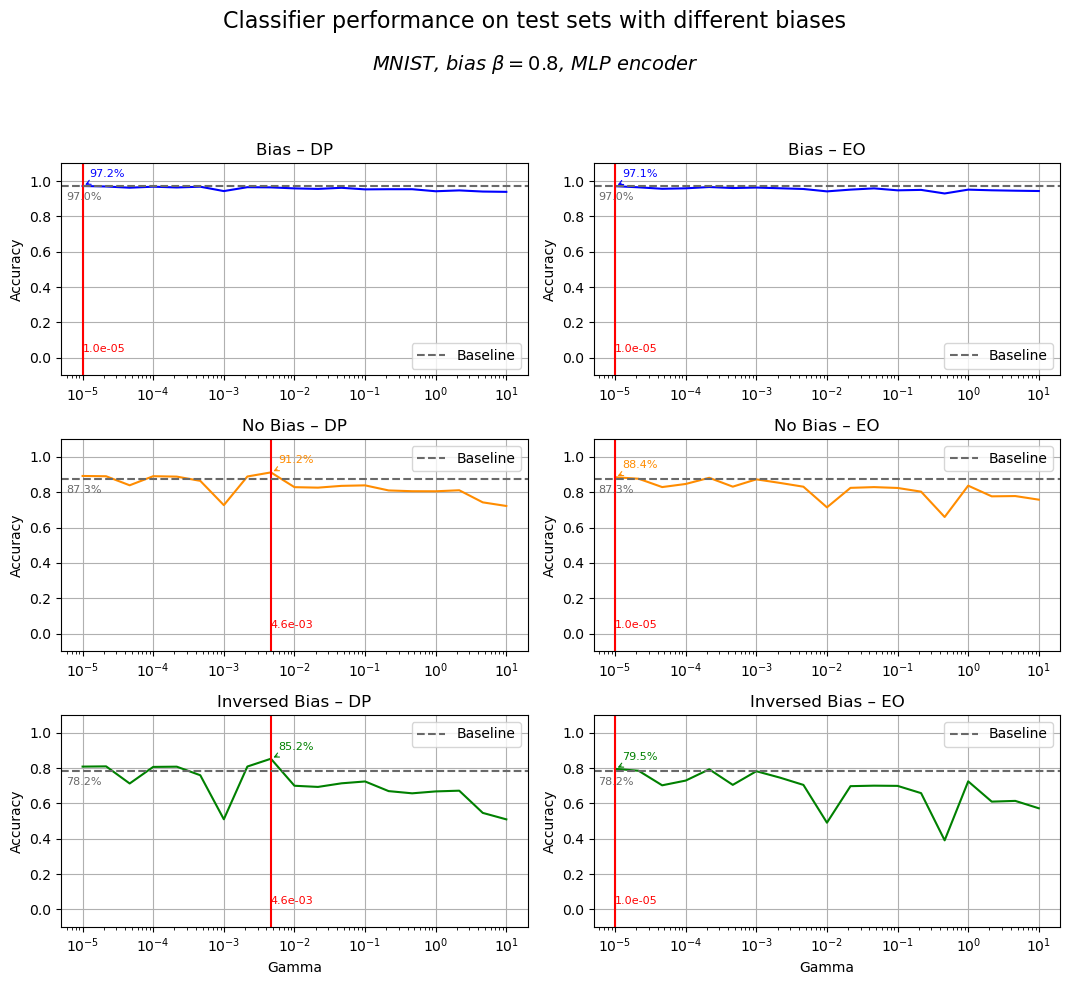

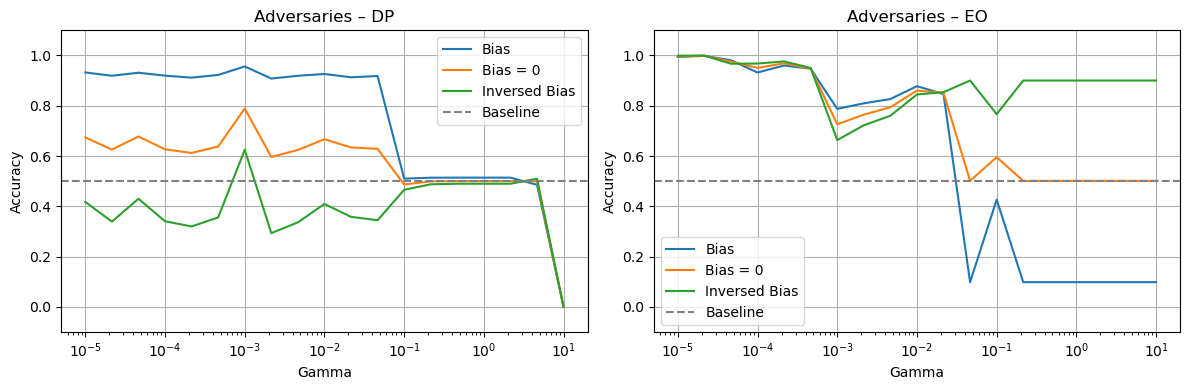

In [131]:
results_matrix = np.load('./npys/mnist_0.8_mlp.npy')
K = 2
baseline_accs = np.load('./npys/baseline_mnist_0.8_mlp.npy')
subtitle = 'MNIST, bias $\\beta=0.8$, MLP encoder'

plot_results(results_matrix, list_gammas, baseline_accs, subtitle)
plot_results_adv(results_matrix, list_gammas, K)

### MNIST dataset, CONV encoder

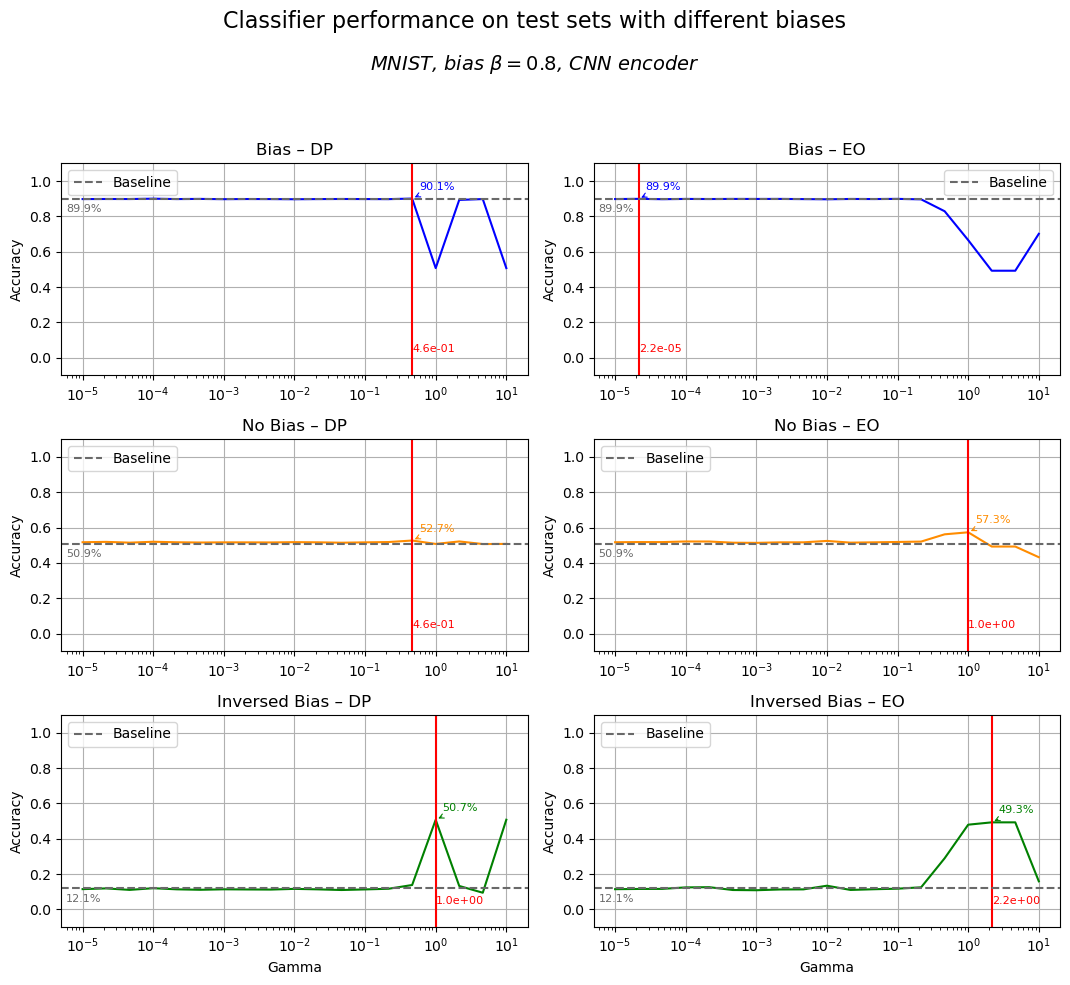

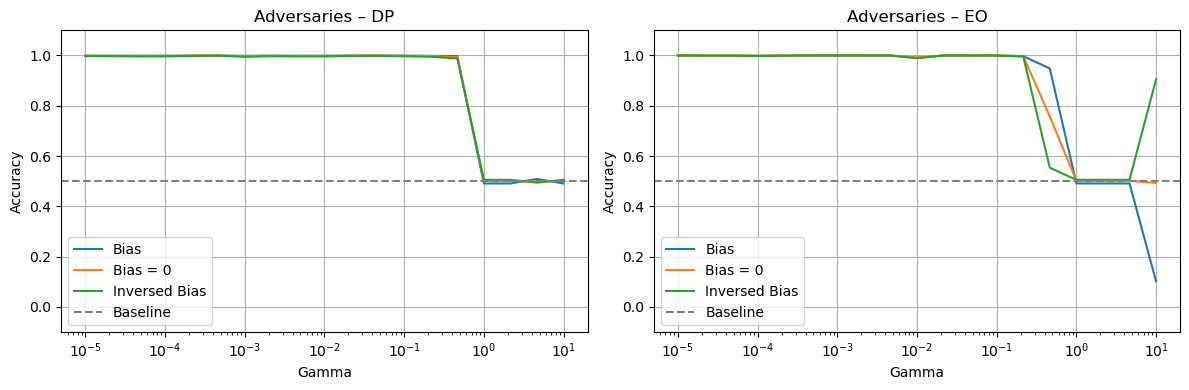

In [132]:
results_matrix = np.load('./npys/mnist_0.8_conv.npy')
K = 2
baseline_accs = np.load('./npys/baseline_mnist_0.8_conv.npy')
subtitle = 'MNIST, bias $\\beta=0.8$, CNN encoder'

plot_results(results_matrix, list_gammas, baseline_accs, subtitle)
plot_results_adv(results_matrix, list_gammas, K)

### CIFAR-10 dataset, K=2

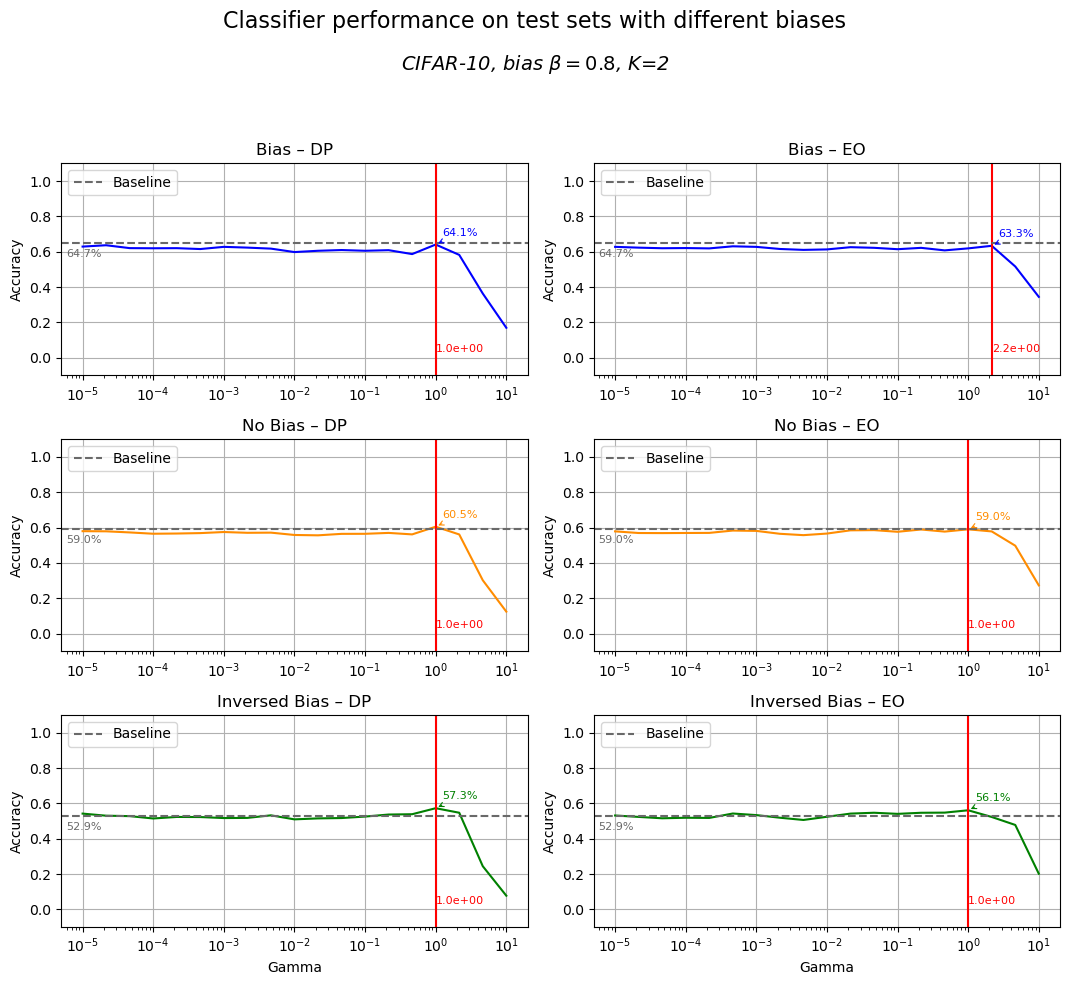

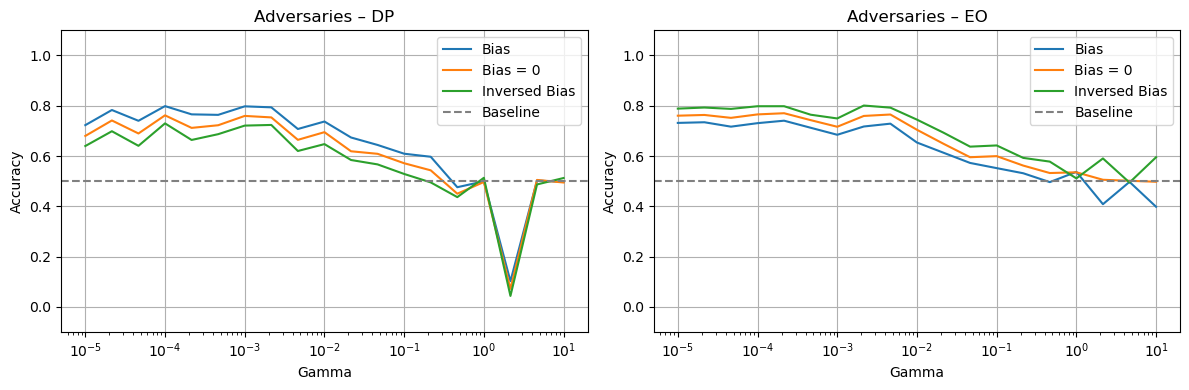

In [133]:
results_matrix = np.load('./npys/cifar_0.8_2.npy')
K = 2
baseline_accs = np.load('./npys/baseline_cifar_0.8_2.npy')
subtitle = 'CIFAR-10, bias $\\beta=0.8$, K=2'

plot_results(results_matrix, list_gammas, baseline_accs, subtitle)
plot_results_adv(results_matrix, list_gammas, K)

### CIFAR-10 dataset, K=10

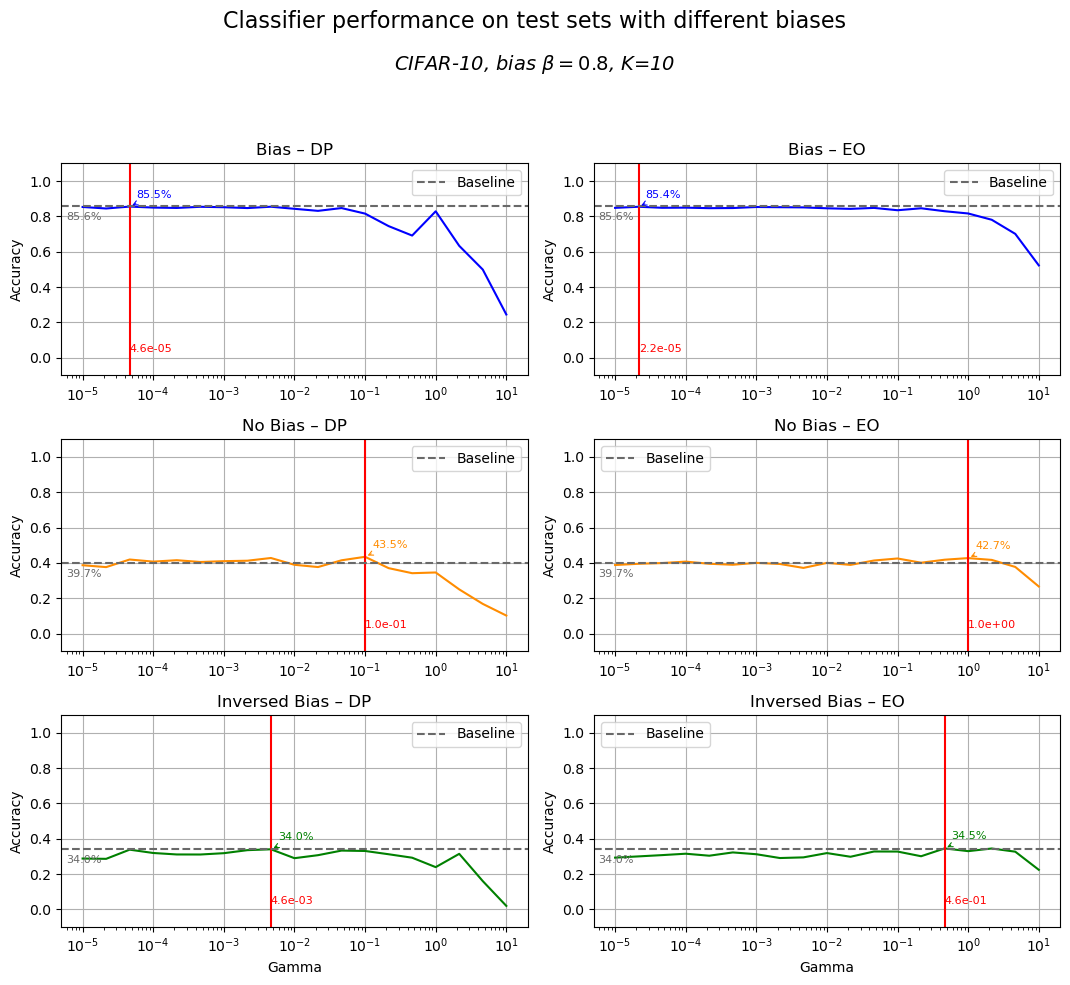

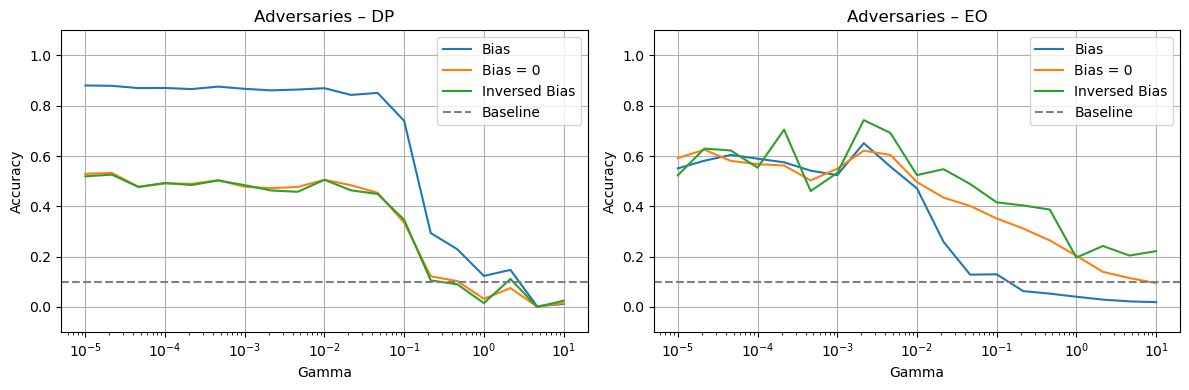

In [134]:
results_matrix = np.load('./npys/cifar_0.8_10.npy')
K = 10
baseline_accs = np.load('./npys/baseline_cifar_0.8_10.npy')
subtitle = 'CIFAR-10, bias $\\beta=0.8$, K=10'

plot_results(results_matrix, list_gammas, baseline_accs, subtitle)
plot_results_adv(results_matrix, list_gammas, K)

## BIAS $\beta \approx 1$

### MNIST dataset, MLP encoder

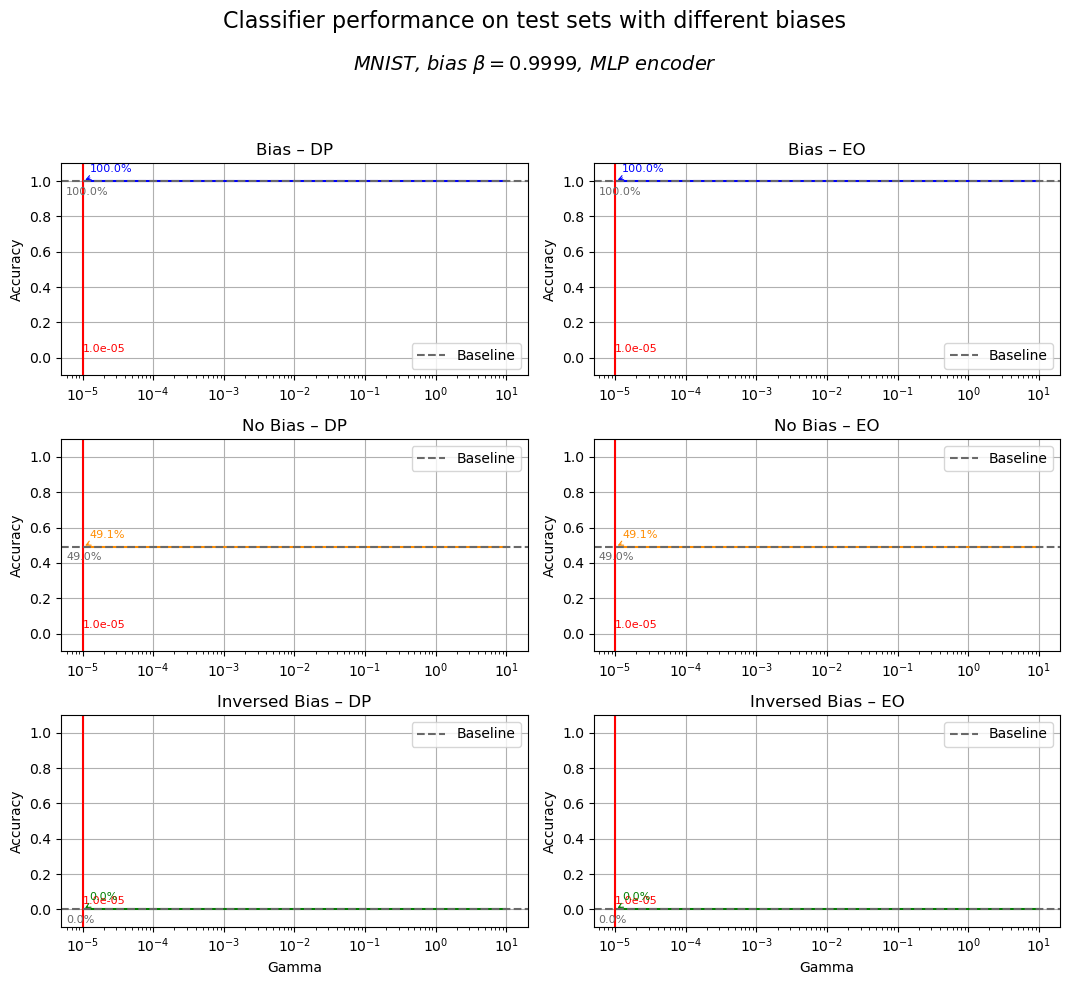

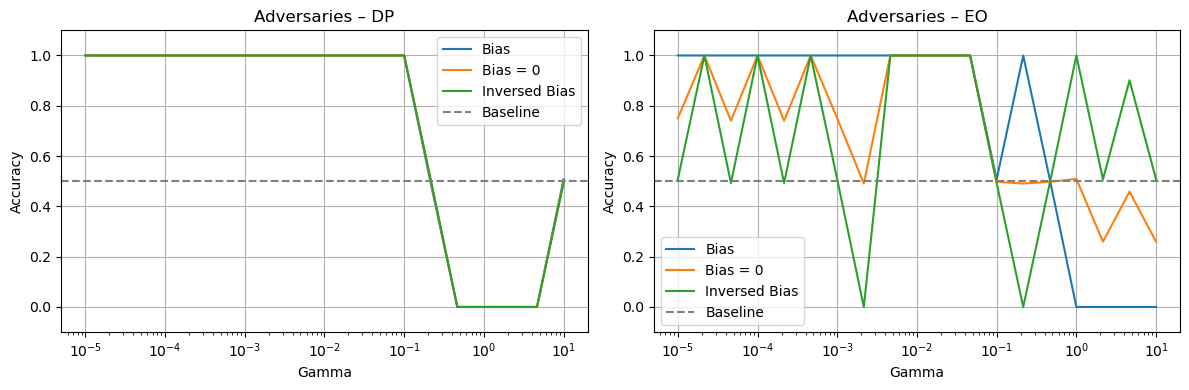

In [135]:
bl_same = np.load('./npys/mnist_bias1_baseline_samebias_MLP.npy').item()
bl_mod = np.load('./npys/mnist_bias1_baseline_modifiedbias_MLP.npy').item()
bl_no = np.load('./npys/mnist_bias1_baseline_nobias_MLP.npy').item()

results_matrix = np.load('./npys/mnist_bias1_MLP.npy')
K = 2
baseline_accs = [bl_same, bl_no, bl_mod]
subtitle = 'MNIST, bias $\\beta=0.9999$, MLP encoder'

plot_results(results_matrix, list_gammas, baseline_accs, subtitle)
plot_results_adv(results_matrix, list_gammas, K)

### MNIST dataset, CNN encoder

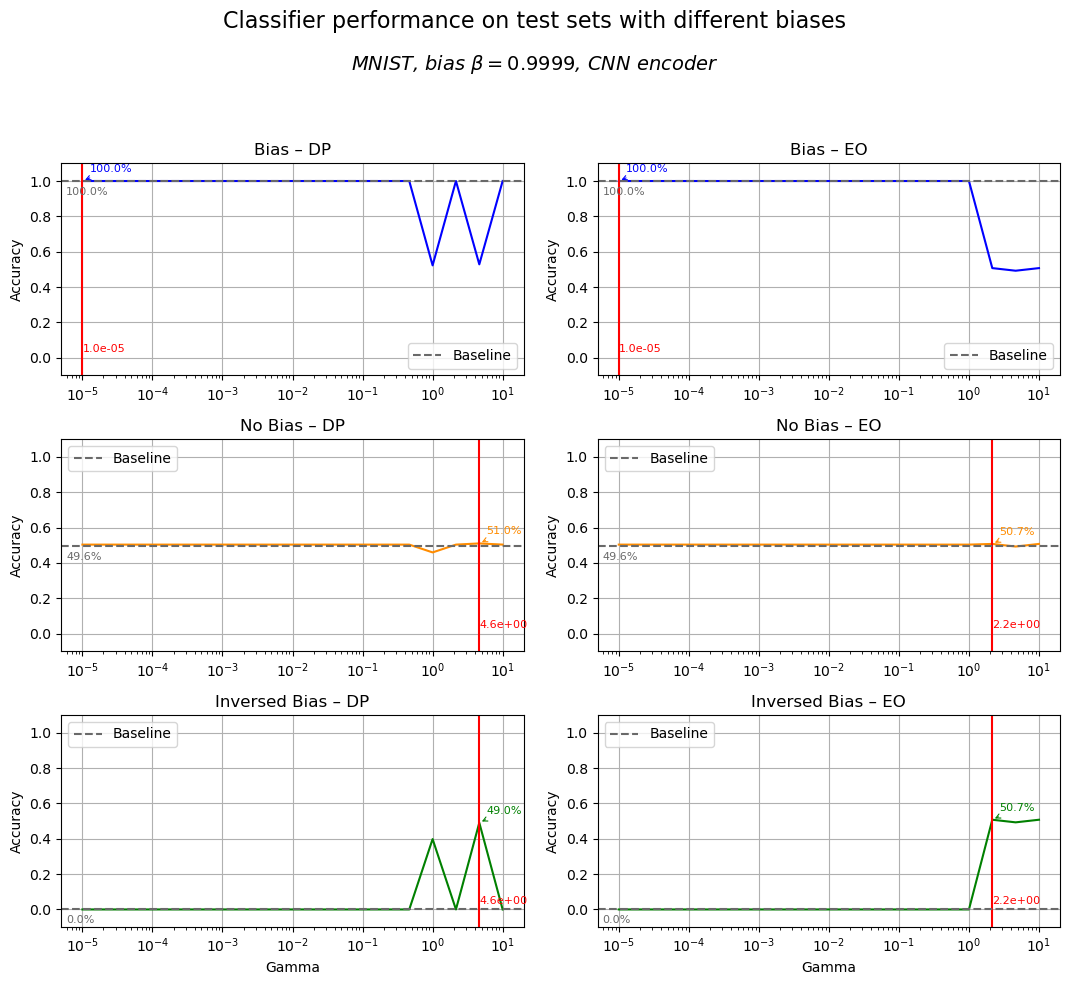

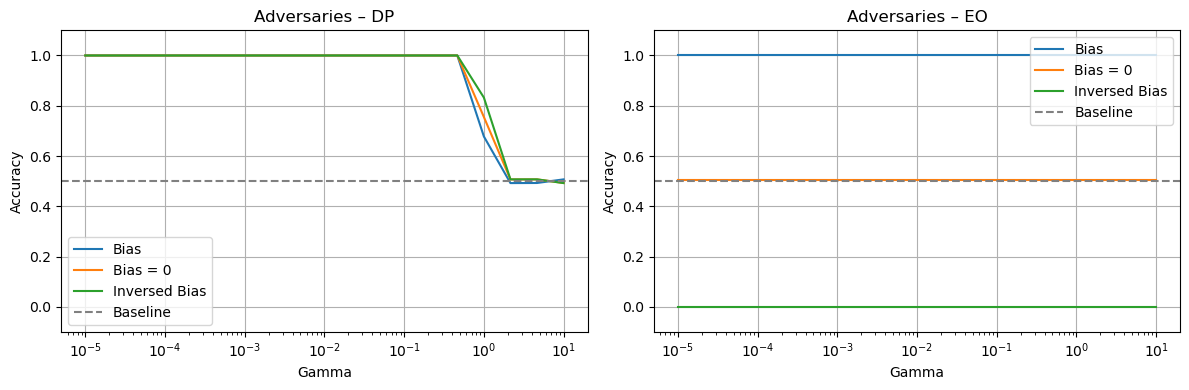

In [136]:
bl_same = np.load('./npys/mnist_bias1_baseline_samebias_CNN.npy').item()
bl_mod = np.load('./npys/mnist_bias1_baseline_modifiedbias_CNN.npy').item()
bl_no = np.load('./npys/mnist_bias1_baseline_nobias_CNN.npy').item()

results_matrix = np.load('./npys/mnist_bias1_CNN.npy')
K = 2
baseline_accs = [bl_same, bl_no, bl_mod]
subtitle = 'MNIST, bias $\\beta=0.9999$, CNN encoder'

plot_results(results_matrix, list_gammas, baseline_accs, subtitle)
plot_results_adv(results_matrix, list_gammas, K)

### CIFAR-10 dataset, K=2

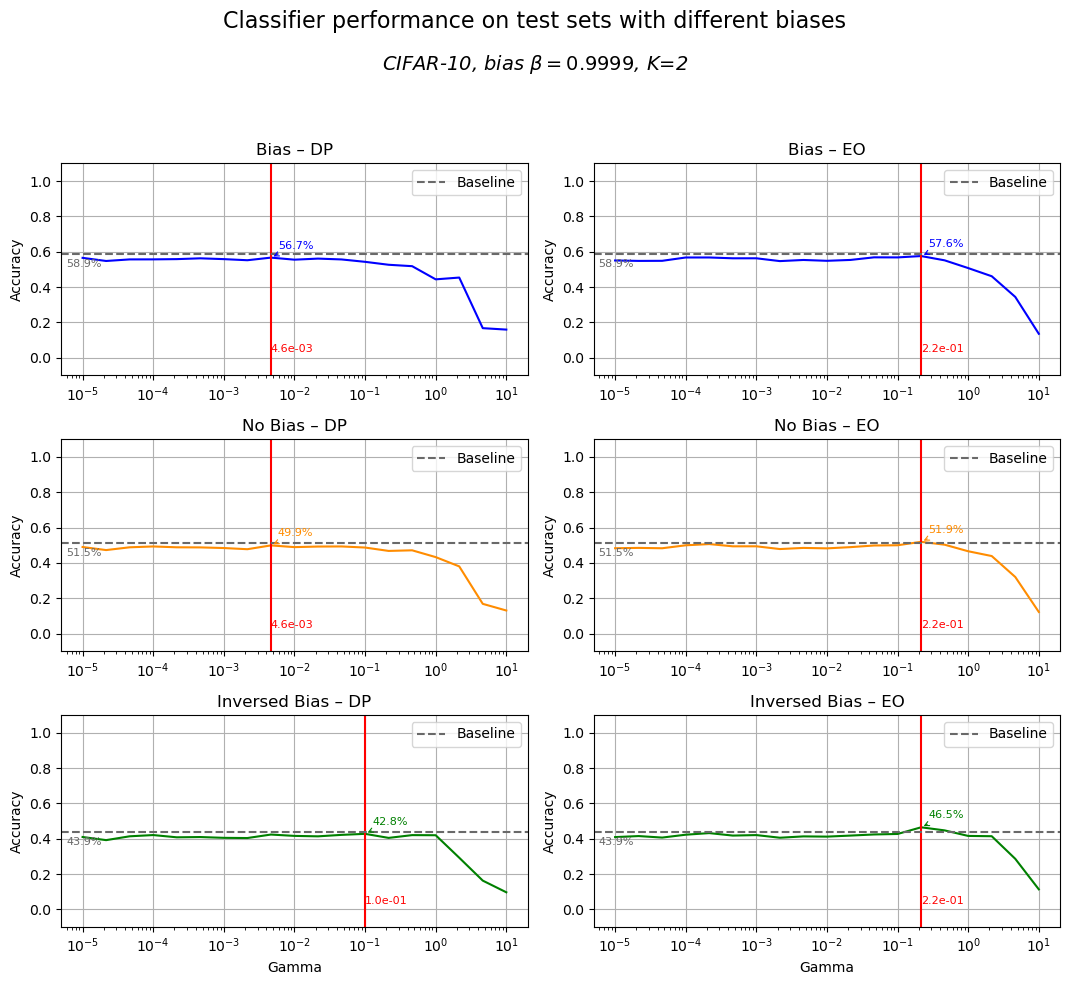

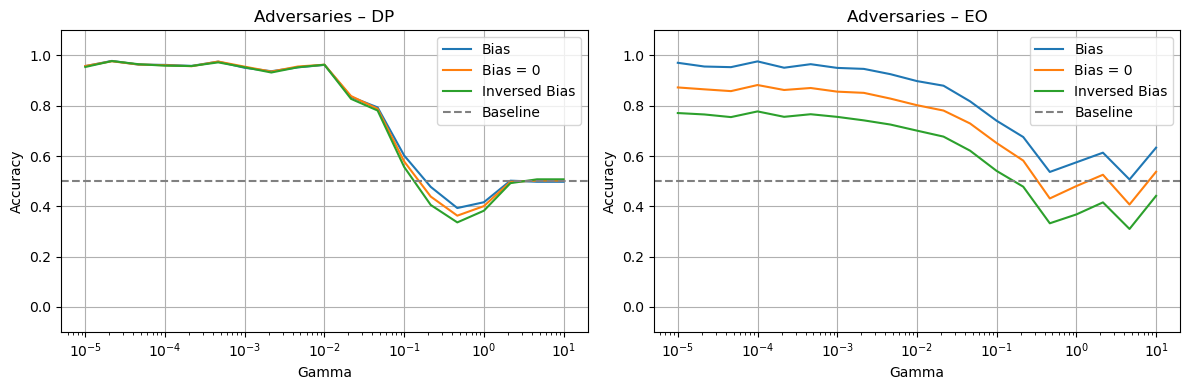

In [137]:
bl_same = np.load('./npys/cifar_k2_bias1_baseline_samebias.npy').item()
bl_mod = np.load('./npys/cifar_k2_bias1_baseline_modifiedbias.npy').item()
bl_no = np.load('./npys/cifar_k2_bias1_baseline_nobias.npy').item()

results_matrix = np.load('./npys/cifar_k2_bias1.npy')
K = 2
baseline_accs = [bl_same, bl_no, bl_mod]
subtitle = 'CIFAR-10, bias $\\beta=0.9999$, K=2'

plot_results(results_matrix, list_gammas, baseline_accs, subtitle)
plot_results_adv(results_matrix, list_gammas, K)

### CIFAR-10 dataset, K=10

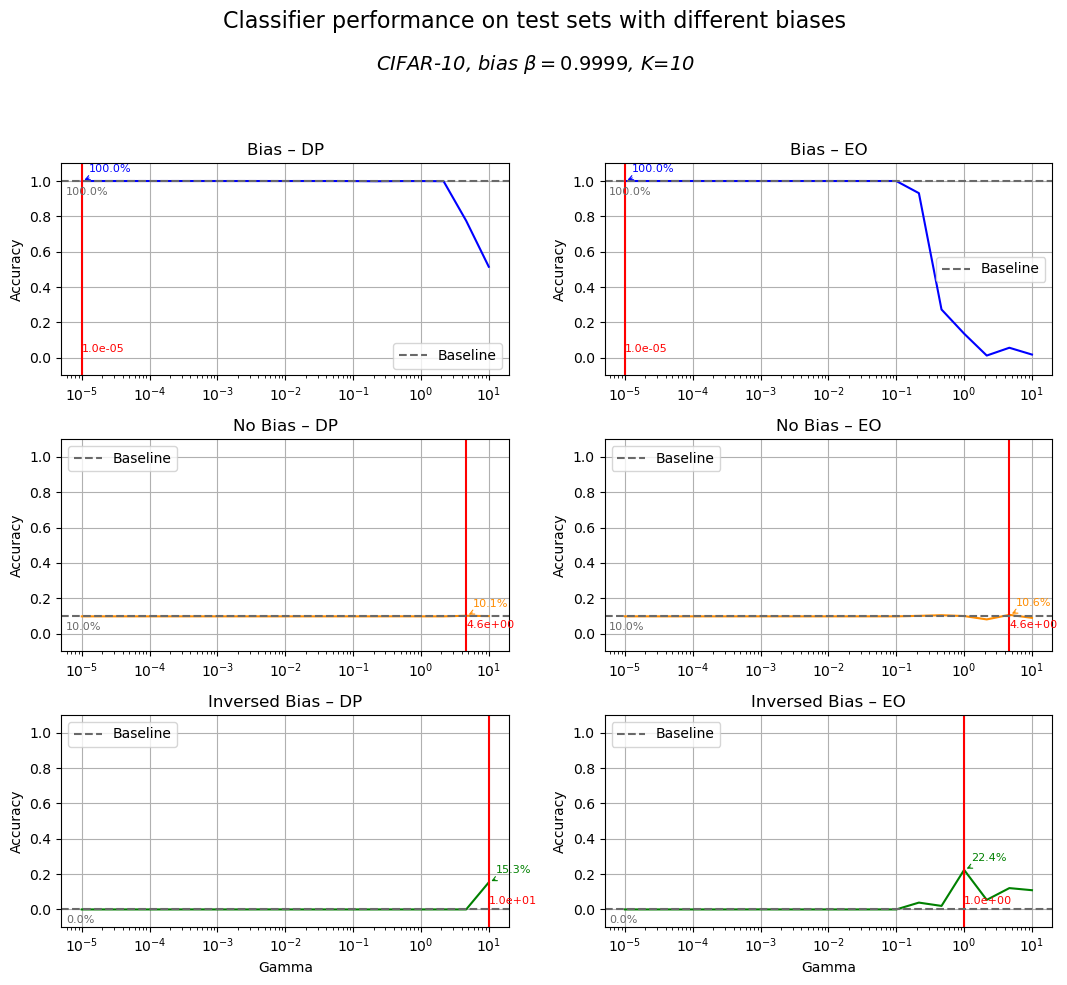

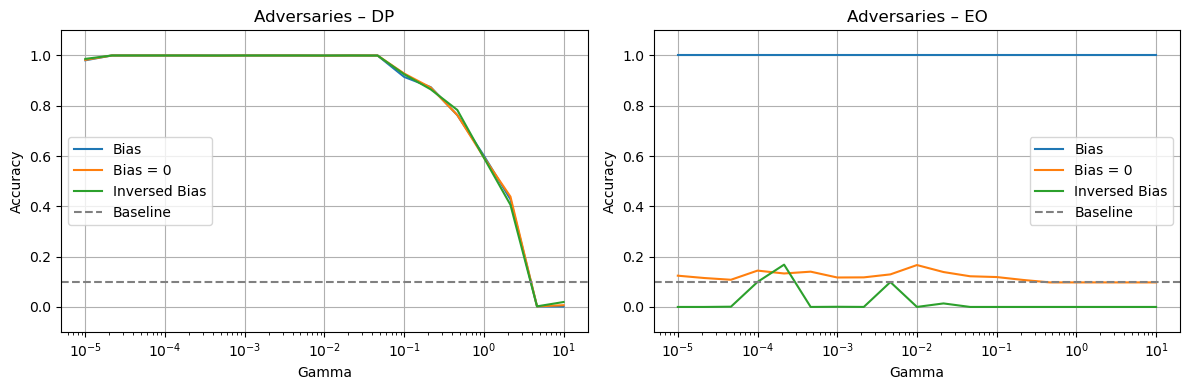

In [138]:
bl_same = np.load('./npys/cifar_k10_bias1_baseline_samebias.npy').item()
bl_mod = np.load('./npys/cifar_k10_bias1_baseline_modifiedbias.npy').item()
bl_no = np.load('./npys/cifar_k10_bias1_baseline_nobias.npy').item()

results_matrix = np.load('./npys/cifar_k10_bias1.npy')
K = 10
baseline_accs = [bl_same, bl_no, bl_mod]
subtitle = 'CIFAR-10, bias $\\beta=0.9999$, K=10'

plot_results(results_matrix, list_gammas, baseline_accs, subtitle)
plot_results_adv(results_matrix, list_gammas, K)

## Other tests

### Changing adversarial Loss to Categorical Cross Entropy

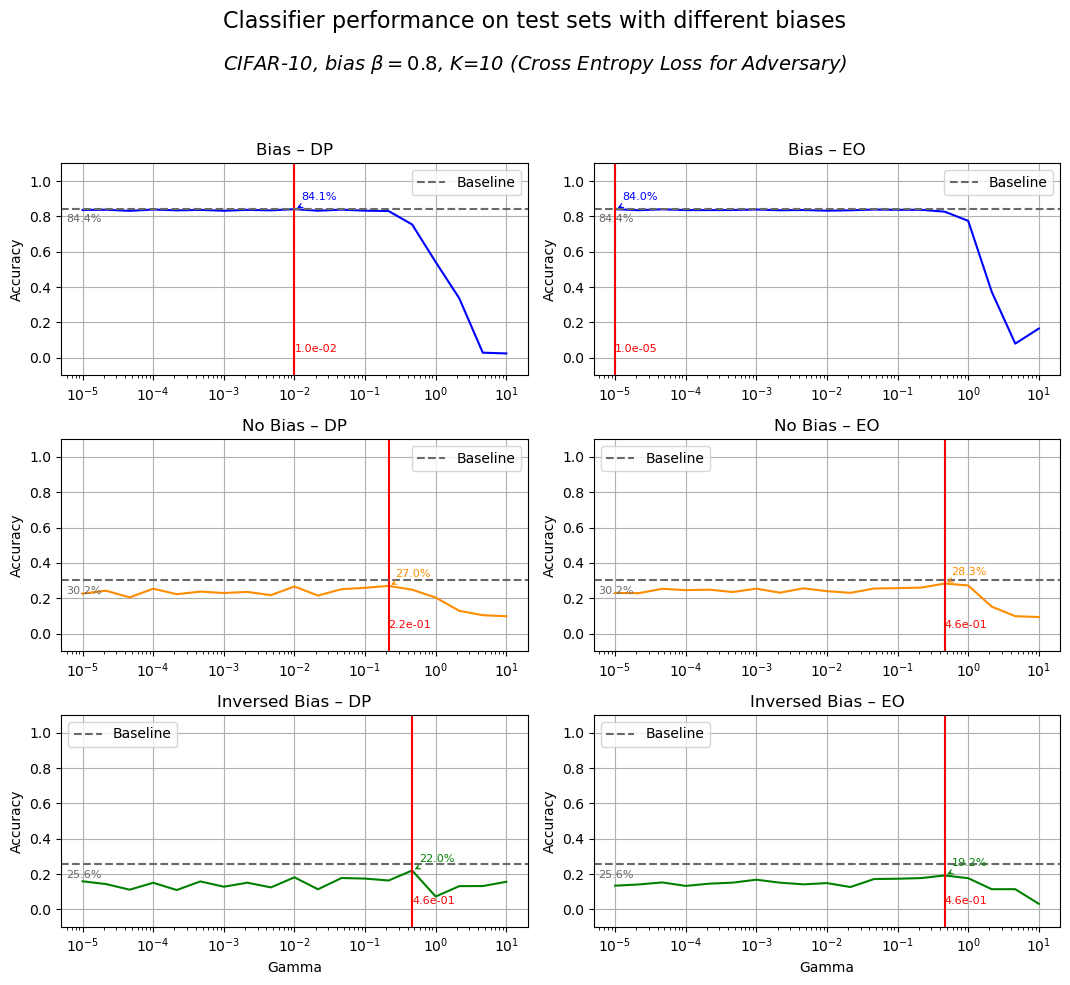

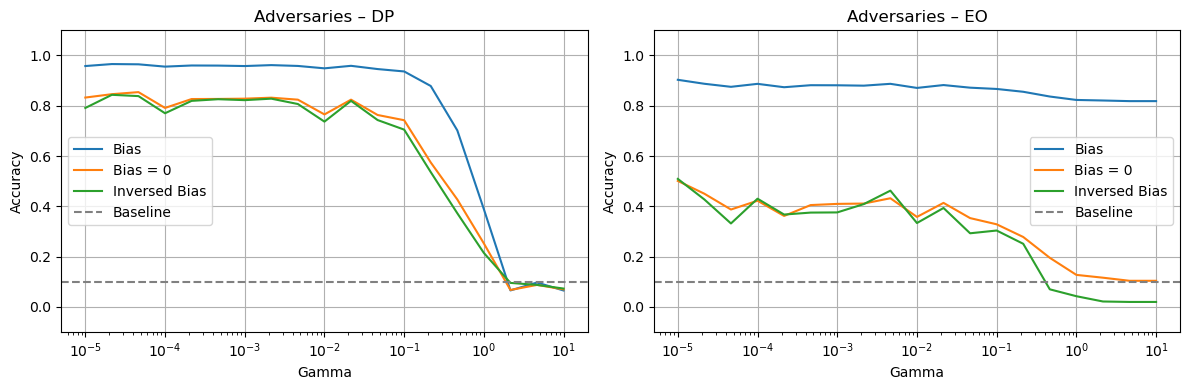

In [139]:
bl_same = np.load('./npys/cifar_k10_bias0.8_baseline_samebias_CCE.npy').item()
bl_mod = np.load('./npys/cifar_k10_bias0.8_baseline_modifiedbias_CCE.npy').item()
bl_no = np.load('./npys/cifar_k10_bias0.8_baseline_nobias_CCE.npy').item()

results_matrix = np.load('./npys/cifar_k10_bias0.8_CCE.npy')
K = 10
baseline_accs = [bl_same, bl_no, bl_mod]
subtitle = 'CIFAR-10, bias $\\beta=0.8$, K=10 (Cross Entropy Loss for Adversary)'

plot_results(results_matrix, list_gammas, baseline_accs, subtitle)
plot_results_adv(results_matrix, list_gammas, K)